In [1]:
import pandas as pd
import numpy as np

In [9]:
%matplotlib inline

In [10]:
##%matplotlib notebook if I want graphs to be interactive.

In [16]:
approach_as_numpy = approach.as_matrix(columns=None)

In [17]:
retract_as_numpy = retract.as_matrix(columns=None)

In [18]:
z_values = data['Z (nm)']

In [19]:
z_values_approach = z_values[:502]

In [20]:
z_values_retract = z_values[-499:]

In [21]:
z_values_approach_as_numpy = z_values_approach.as_matrix(columns=None)

In [22]:
z_values_retract_as_numpy = z_values_retract.as_matrix(columns=None)

In [23]:
approach_as_numpy_reshape = np.array(approach_as_numpy.tolist())

In [31]:
X.shape

(502, 48, 48)

In [32]:
c.shape

(502, 48, 48)

In [33]:
approach_as_numpy.shape

(502, 2304)

In [43]:
approach_as_numpy_reshape.shape

(502, 2304)

In [34]:
# domains
x = np.linspace(0,48,48) 
y = np.linspace(0,48,48)             # [6, 9]
z = z_values_approach_as_numpy            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)

In [27]:
approach_as_numpy_reshape1 = approach_as_numpy.reshape(502,48,48)

In [28]:
approach_as_numpy_reshape1.shape

(502, 48, 48)

In [78]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=np.min(cs), vmax=np.max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap,label='Test')
    plt.show()

In [77]:
a = approach_as_numpy_reshape1
b = np.linspace(0,48,48)
c = z_values_approach_as_numpy
d = approach_as_numpy_reshape1
scatter3d(a,b,c,d)

95.25831054

In [89]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

In [124]:
def import_data_retract(file):
    """
    Function to import data file and clean for use in graphing code
    
    import file as CSV!
    
    returns shaped np array (500,48,48)
    
    """
    data = pd.read_csv(file)
    data.rename(columns={'Phase ': 'Unnamed: 1'}, inplace=True) ##this is specific
            ##to the example data might not need in the future.
    i = iter(range(1, len(data.columns) + 1)) ##replace unnamed columns with 
    data.columns = [x if not x.startswith('Unnamed') else next(i) for x in data.columns]
    data = pd.DataFrame(data)
    retract = data[-500:]
    Z_nm = data['Z (nm)']
    retract = retract.drop(['Z (nm)'], axis=1)
    retract_as_numpy = retract.as_matrix(columns=None)
    retract_as_numpy_reshape = np.array(retract_as_numpy.tolist())
    retract_as_numpy_reshape1 = retract_as_numpy.reshape(500,48,48)
    return retract_as_numpy_reshape1, Z_nm

In [125]:
retract_as_numpy_reshape1,Z_nm = import_data_retract("PHASEdata.csv")

<IPython.core.display.Javascript object>


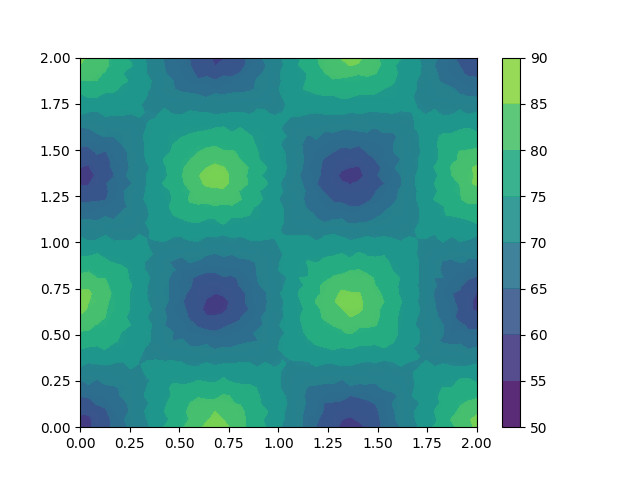

In [4]:
retract_as_numpy_reshape1 = import_data_retract("PHASEdata.csv")

x = np.linspace(0, 2, 48)
y = np.linspace(0, 2, 48)
X, Y = np.meshgrid(x, y)
s = np.shape(X)
nFrames = 500
for i in range(1,501): 
    retract_as_numpy_reshape1[i-1,:,:]

# Set up plotting
fig = plt.figure()
ax = plt.axes()  

# Animation function
def animate(i): 
    z = retract_as_numpy_reshape1[i,:,:]
    cont = plt.contourf(X, Y, z, alpha=0.9, cmap = 'viridis',
                       vmax = np.max(retract_as_numpy_reshape1),
                       vmin = np.min(retract_as_numpy_reshape1))

    return cont  

anim = animation.FuncAnimation(fig, animate, frames=nFrames)
core = plt.contourf(X, Y, retract_as_numpy_reshape1[1,:,:], alpha=0.9, cmap = 'viridis',
                       vmax = np.max(retract_as_numpy_reshape1),
                       vmin = np.min(retract_as_numpy_reshape1))
cbar = plt.colorbar(core)
plt.show()

In [88]:
retract_as_numpy_reshape1, Z_nm = import_data_retract("PHASEdata.csv")

In [ ]:
retract_as_numpy_reshape2 = retract_as_numpy_reshape1.flatten('F')

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


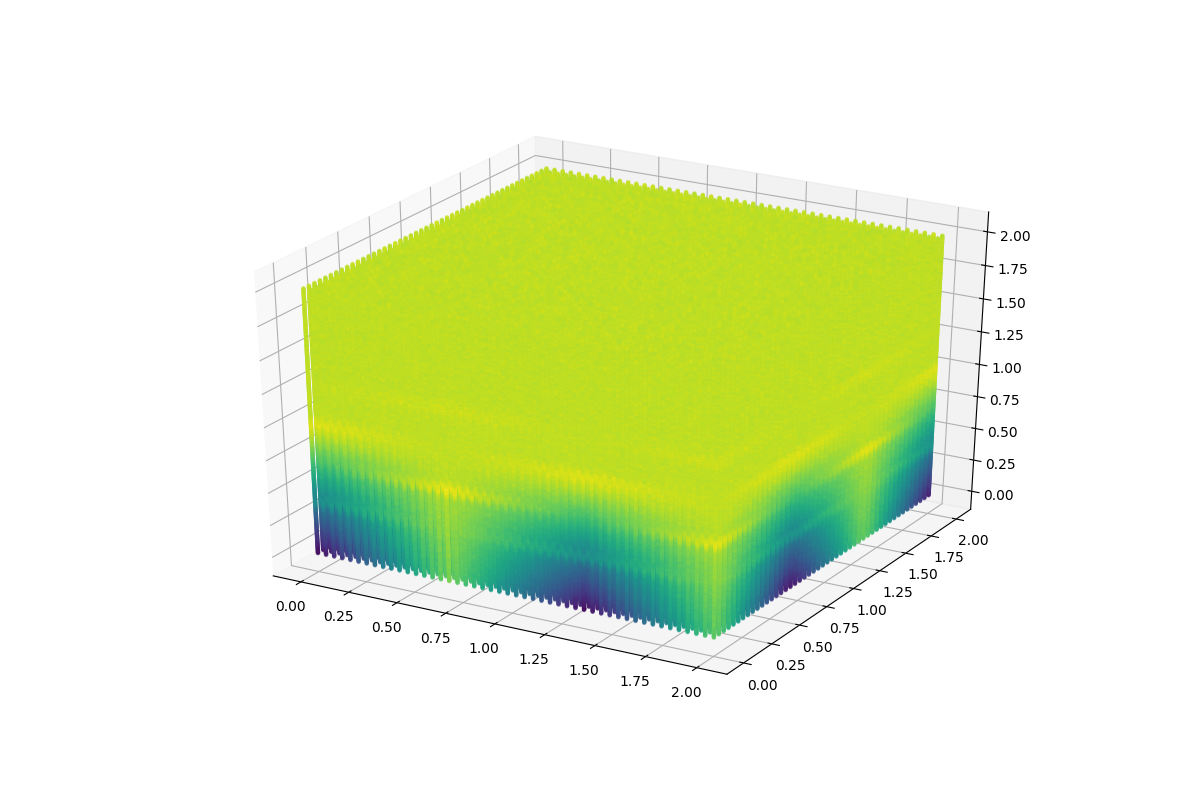

In [47]:
#This works, do not edit.
%pylab
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = np.linspace(0,2,48)
y = np.linspace(0,2,48)
z = np.linspace(0,2,500)

points = []
for element in itertools.product(x, y, z):
    points.append(element)

fxyz = list(retract_as_numpy_reshape2)
xi, yi, zi = zip(*points)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=fxyz, alpha=0.5, marker=".")
plt.show()

In [16]:
%pylab
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = np.linspace(0,2,48)
y = np.linspace(0,2,48)
z = np.linspace(0,2,500)

points = []
for element in itertools.product(x, y, z):
    points.append(element)

fxyz = list(retract_as_numpy_reshape2)
xi, yi, zi = zip(*points)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=fxyz, alpha=0.5, marker=".")
plt.show()

In [43]:
retract_as_numpy_reshape2 = retract_as_numpy_reshape1.flatten('F')

In [37]:
len(points)

1152000

In [44]:
len(retract_as_numpy_reshape2)

1152000

In [2]:
import scipy.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mat_phase = scipy.io.loadmat('FFM0012_04272018_PHASEtot.mat')
mat_zsensor = scipy.io.loadmat('FFM0012_04272018_ZSNSRtot.mat')
phase = mat_phase['PHASEtot']
zsensor = mat_zsensor['ZSNSRtot']

In [3]:
phase.shape

(5000, 64, 64)

In [4]:
zsensor.shape

(5000, 64, 64)

In [90]:
retract_as_numpy_reshape1.shape

(500, 48, 48)

In [15]:
bins = np.linspace(np.amin(retract_as_numpy_reshape1[:,1,1]),np.amax(retract_as_numpy_reshape1[:,1,1]), 300)
digitized = np.digitize(retract_as_numpy_reshape1[:,1,1], bins)
bin_means = [retract_as_numpy_reshape1[digitized == i].mean() for i in range(1, len(bins))]

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
np.array([[1,1],[2,3]])

In [50]:
retract_as_numpy_reshape1[[156,162,164],1,1]

array([79.80806325, 79.74249893, 79.7486404 ])

In [77]:
ind = list(np.where(digitized == 13))
print(ind)
print(np.mean(retract_as_numpy_reshape1[ind,1,1]))

[array([ 2, 10, 11])]
55.15500682666667


In [80]:
retract_as_numpy_reshape1[0,0,0]

55.15500682666667

In [79]:
retract_as_numpy_reshape1[0,0,0] = np.mean(retract_as_numpy_reshape1[ind,1,1])

In [253]:
#phase_pd1 = phase_pd1.replace({0:np.nan})
#zsensor_pd1 = zsensor_pd1.replace({0:np.nan})

In [304]:
zsensor[zsensor == 0] = np.nan # or use np.nan
phase[phase == 0] = np.nan

In [305]:
mask = np.isnan(zsensor)
zsensor[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), zsensor[~mask])
mask = np.isnan(phase)
phase[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), phase[~mask])

In [306]:
phase[0,0,0]

100.29301452636719

In [252]:
#phase_pd1 = phase_pd1.interpolate(limit_direction='both')
#zsensor_pd1 = zsensor_pd1.interpolate(limit_direction='both')

In [246]:
#phase = np.array(phase_pd1)
#phase = phase.reshape((5000,64,64))
#zsensor = np.array(zsensor_pd1)
#zsensor = zsensor.reshape((5000,64,64))

In [259]:
zsensor_pd1.iloc[0,0]

nan

In [64]:
zsensor_pd1 = zsensor_pd1.multiply(10000000)

In [65]:
phase_pd1 = phase_pd1.drop(phase_pd1.columns[0], axis=1)

In [66]:
zsensor_pd1 = zsensor_pd1.drop(zsensor_pd1.columns[0], axis=1)

In [67]:
zsensor_pd1.shape

(320000, 63)

In [68]:
zsensor_pd1.head()

1             2             3             4   \
major minor                                                           
0     0      2.524826e+09  2.522872e+09  2.523455e+09  2.523874e+09   
      1      2.524507e+09  2.522786e+09  2.523255e+09  2.523911e+09   
      2      2.524139e+09  2.522539e+09  2.523168e+09  2.524191e+09   
      3      2.523969e+09  2.522523e+09  2.523474e+09  2.524501e+09   
      4      2.523760e+09  2.522694e+09  2.523822e+09  2.524576e+09   

                       5             6             7             8   \
major minor                                                           
0     0      2.523478e+09  2.524430e+09  2.523485e+09  2.524523e+09   
      1      2.523993e+09  2.524299e+09  2.523840e+09  2.524591e+09   
      2      2.524275e+09  2.524285e+09  2.524073e+09  2.524619e+09   
      3      2.524345e+09  2.523927e+09  2.523934e+09  2.524336e+09   
      4      2.524208e+09  2.523705e+09  2.523901e+09  2.524001e+09   

                       9             10      ...                 54  \
major minor                                  ...                      
0     0      2.524527e+09  2.525595e+09      ...       2.539015e+09   
      1      2.524390e+09  2.524874e+09      ...       2.539273e+09   
      2      2.524550e+09  2.524380e+09      ...       2.539446e+09   
      3      2.524348e+09  2.524019e+09      ...       2.539448e+09   
      4      2.523997e+09  2.524164e+09      ...       2.539226e+09   

                       55            56            57            58  \
major minor                                                           
0     0      2.539775e+09  2.540331e+09  2.539849e+09  2.540581e+09   
      1      2.539710e+09  2.540358e+09  2.539733e+09  2.540620e+09   
      2      2.539474e+09  2.540380e+09  2.539982e+09  2.540750e+09   
      3      2.539521e+09  2.540261e+09  2.540066e+09  2.540417e+09   
      4      2.539606e+09  2.539651e+09  2.539871e+09  2.539879e+09   

                       59            60            61            62  \
major minor                                                           
0     0      2.541179e+09  2.541120e+09  2.540983e+09  2.541273e+09   
      1      2.541109e+09  2.541435e+09  2.541277e+09  2.541033e+09   
      2      2.541119e+09  2.541483e+09  2.541303e+09  2.541475e+09   
      3      2.540784e+09  2.541001e+09  2.541157e+09  2.541976e+09   
      4      2.540555e+09  2.540520e+09  2.541156e+09  2.542174e+09   

                       63  
major minor                
0     0      2.542011e+09  
      1      2.541768e+09  
      2      2.541549e+09  
      3      2.541844e+09  
      4      2.542383e+09  

[5 rows x 63 columns]

In [13]:
jointrows = pd.concat([zsensor_pd1.iloc[1], zsensor_pd1.iloc[1][::-1]])

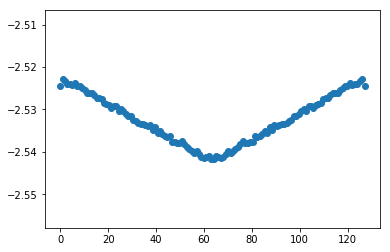

In [14]:
plt1 = plt.scatter(np.linspace(0,127,126), jointrows)

In [55]:
zsensor_pd2 = zsensor_pd1 = zsensor_pd1.multiply(-1)

## Attempt to replicate Elias matlab code.

In [106]:
zsensor.shape

(5000, 64, 64)

In [109]:
len(zsensor[1,1,:])

64

In [264]:
#This needs to be added to .py file!!
zsensor = np.multiply(zsensor, -1000000000)

In [8]:
len(zsensor) - len(zsensor)

0

In [7]:
len(zsensor[1,1,:])-1

63

In [265]:
#Find max z for every x,y position.  Populate matrix with values.
Zmax, indZ = np.zeros((64,64)), np.zeros((64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(zsensor[1,1,:])):
        Zmax[j,i] = np.min(zsensor[:,i,j])
        indZ[j,i] = np.min(np.where(zsensor[:,i,j] == np.min(zsensor[:,i,j])))

In [50]:
int(indZ[60,60])

2498

In [75]:
np.nonzero(zsensor[:,5,5] == min(zsensor[:,5,5]))

(array([2505, 2506, 2507, 2508, 2509, 2510]),)

In [71]:
where = np.where(zsensor[:,5,5] == max(zsensor[:,5,5]))
here = np.max(where)
print(here)

2510


In [ ]:
np.max(np.where(zsensor[:,5,5] == max(zsensor[:,5,5])))

In [11]:
Zmax_pd = pd.DataFrame(Zmax)
print(Zmax_pd.shape)
Zmax_pd.head()

(64, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
1,252.482579,252.450747,252.414367,252.397143,252.375969,252.303266,252.219650,252.218769,252.218882,252.194354,...,252.324384,252.323758,252.323730,252.320689,252.314436,252.317051,252.316568,252.265068,252.229512,252.233377
2,252.287151,252.278625,252.254040,252.269388,252.306222,252.339930,252.349622,252.363918,252.382307,252.381568,...,252.204387,252.218740,252.219166,252.217148,252.232041,252.248697,252.259554,252.267768,252.277459,252.284025
3,252.345473,252.325520,252.347348,252.382165,252.408682,252.440060,252.440003,252.434774,252.409677,252.392965,...,252.343654,252.343654,252.338822,252.366675,252.421700,252.434575,252.435399,252.412320,252.385632,252.374946
4,252.391118,252.419056,252.450064,252.457568,252.458904,252.459245,252.415958,252.328590,252.341948,252.378328,...,252.450860,252.426702,252.388958,252.362156,252.358802,252.408825,252.427185,252.427270,252.400127,252.349622


In [224]:
print(np.mean(Zmax[5,:]))

-2.47942023356984e-07


In [76]:
#Correct the sample tilt in the z-direction.
Zdrifty = np.zeros(64)
Zcorr = np.zeros((64,64))
for j in range(len(zsensor[1,:,1])):
    Zdrifty[j] = np.mean(Zmax[j,:])
    Zcorr[j,:] = Zmax[j,:] - Zdrifty[j]

In [77]:
#Correct the sample tilt in the x,y plane
Zdriftx = np.zeros(64)
for i in range(len(Zcorr)):
    Zdriftx[i] = np.mean(Zcorr[:,i])
    Zcorr[:,i] = Zcorr[:,i]-Zdriftx[i]

In [266]:
#This is just to compile the code from the previous two cells.
Zdrifty = np.zeros(64)
Zdriftx = np.zeros(64)
Zcorr = np.zeros((64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(Zcorr)):
        Zdrifty[j] = np.mean(Zmax[j,:])
        Zdriftx[i] = np.mean(Zcorr[:,i])
        Zcorr[j,:] = Zmax[j,:] - Zdrifty[j]
        Zcorr[:,i] = Zcorr[:,i]-Zdriftx[i]

In [228]:
print(Zcorr[1,1])
print(np.amax(Zcorr))

-7.660293233069382e-11
1.5719671397906865e-10


In [267]:
#flip Zdata, so the z-values so that the hegiht map matches the sample.
Zcorr = np.subtract(Zcorr, np.amin(Zcorr))

In [71]:
#Do this earlier with zsensor.
#Zcorr = np.multiply(Zcorr, -1000000000)

In [73]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


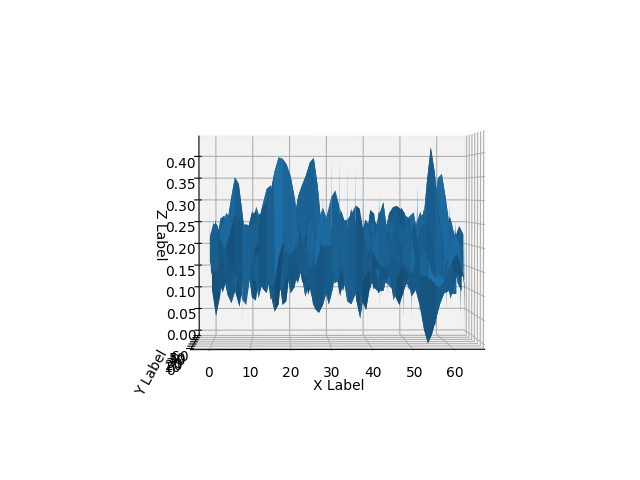

In [268]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.linspace(0, 63, 64)
X, Y = np.meshgrid(x, y)
Z = Zcorr

ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [73]:
Zcorr[1,1]

0.2741724579276955

In [28]:
#zsensor = np.multiply(zsensor, -1000000000)
#Zdriftx = np.multiply(Zdriftx, -1000000000)
#Zdrifty = np.multiply(Zdrifty, -1000000000)

In [307]:

DIFF = np.zeros((64,64))
m = 0
ZSNSRtotCORR = np.zeros((5000,64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(zsensor[1,1,:])):
        ZSNSRtotCORR[:,i,j] = zsensor[:,i,j] - Zdriftx[i] - Zdrifty[j]
        #DIFF[i,j] = max(ZSNSRtotCORR[:,i,j]) - min(ZSNSRtotCORR[:,i,j])
        #m = m + 1

In [308]:
ZMEAN = np.zeros(5000)
for z in range(len(ZMEAN)):
    ZMEAN[z] = np.mean(ZSNSRtotCORR[z,:,:])

In [18]:
Ztest = np.empty_like(zsensor)
Ztest.shape

(5000, 64, 64)

<IPython.core.display.Javascript object>


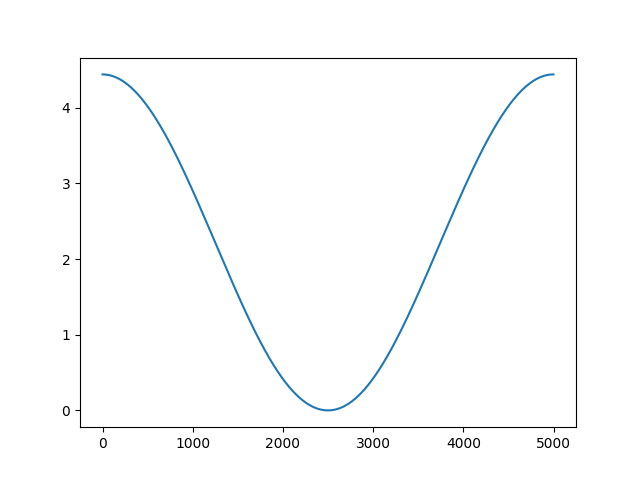

In [277]:
x = np.linspace(0,4999,5000)

Fig, ax = plt.subplots()

# This plots a gap---as desired
ax.plot(x, ZMEAN)


In [275]:
np.max(ZMEAN)

4.439240219275542

In [283]:
Zlinear = np.flip(np.arange(0,np.max(ZMEAN),(0.01)), axis = 0)

In [297]:
print(phase[:(int(indZ[0,0])),0,0])

[nan nan nan ... nan nan nan]


In [309]:
#A bit faster now!!
reduced_phase = np.zeros((444,64,64))
for j in range(len(zsensor[1,:,1])):
    for i in range(len(zsensor[1,1,:])):
        z = phase[:(int(indZ[i,j])),i,j]
        bin_means = (np.histogram(z, len(Zlinear), weights=z)[0] /
             np.histogram(z, len(Zlinear))[0])
        #bin_means_df = pd.DataFrame(bin_means)
        #interpolated = bin_means_df.interpolate(method = 'index')
        #interpolated = np.array(bin_means_df)
        reduced_phase[:,i,j] = bin_means.flatten()

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [310]:
reduced_phase[0,0,0]

69.77874183654785

In [289]:
z = phase[:(int(indZ[3,3])),3,3]
bin_means = (np.histogram(z, len(Zlinear), weights=z)[0] /
             np.histogram(z, len(Zlinear))[0])

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [210]:
z = phase[:(int(indZ[0,0])),0,0]
bin_means = (np.histogram(z, len(Zlinear), weights=z)[0] /
             np.histogram(z, len(Zlinear))[0])
bin_means_df = pd.DataFrame(bin_means)
interpolated = bin_means_df.interpolate(method = 'index')
interpolated = np.array(bin_means_df)
reduced_phase[:,0,0] = interpolated.flatten()

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [197]:
reduced_phase[0,0,0]

nan

In [103]:
bin_means = (np.histogram(array, len(Zlinear), weights=array)[0] /
             np.histogram(array, len(Zlinear))[0])

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [120]:
bin_means.shape

(437, 1)

In [116]:
bin_means_df = pd.DataFrame(bin_means)
bin_means_df = bin_means_df.interpolate()
bin_means = np.array(bin_means_df)

In [119]:
bin_means.shape

(437, 1)

In [296]:
np.argwhere(phase == np.nan)

array([], shape=(0, 3), dtype=int64)

105.76905568440755

In [113]:
obejct.shape

(2532,)

In [31]:
ZSNSRtotCORR[indZ[5,5],5,5]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Ellen's ideas on Zsensor Code

In [51]:
print(ZSNSRtotCORR[5,:,:])

[[-1.54087715e-11 -4.60203541e-09 -4.44394231e-09 ... -4.40400803e-09
  -4.38128665e-09 -4.43075153e-09]
 [-1.13586779e-11 -4.56618142e-09 -4.43142255e-09 ... -4.42971547e-09
  -4.35353285e-09 -4.40223034e-09]
 [-9.07206255e-12 -4.52731606e-09 -4.40455115e-09 ... -4.43041313e-09
  -4.39561253e-09 -4.37805901e-09]
 ...
 [ 2.19892160e-12 -4.36691637e-09 -4.39896451e-09 ... -4.46888014e-09
  -4.44783564e-09 -4.46416080e-09]
 [-5.89514548e-13 -4.33338186e-09 -4.40965418e-09 ... -4.49557123e-09
  -4.44005120e-09 -4.43275792e-09]
 [-4.16887358e-12 -4.33841073e-09 -4.42306745e-09 ... -4.47629954e-09
  -4.43680935e-09 -4.40390811e-09]]


In [47]:
print(np.amax(ZSNSRtotCORR))
print(np.amin(ZSNSRtotCORR))

1.5719671397906865e-10
-4.721142796149103e-09


In [81]:
Zdriftx[30]

-6.452380666553265e-13

In [77]:
ZSNSRtotCORR = np.multiply(ZSNSRtotCORR, -1000000000)

In [78]:
np.where(ZSNSRtotCORR == np.min(ZSNSRtotCORR))

(array([2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505]),
 array([9, 9, 9, 9, 9, 9, 9, 9]),
 array([1, 1, 1, 1, 1, 1, 1, 1]))

In [79]:
print(ZSNSRtotCORR[2498,9,1])

-0.16532746889019906


In [54]:
np.argwhere(ZSNSRtotCORR == np.nan)

array([], shape=(0, 3), dtype=int64)

In [64]:
phase1 = phase.transpose(2, 0, 1)
print(phase.shape)
print(phase1.shape)

(5000, 64, 64)
(64, 5000, 64)


In [2]:
from timeit import default_timer as timer 

In [3]:
def correct_slope(threeD_array):
    """Function that corrects for sample tilt and generates arrays used in the bin_array
    function.

    :param threeD_array: 3D numpy array of a single signal feed.  For instance, the entire dataset of
    zsensor data.  The function is flexible enough to work on any raw data signal, but can
    only work on one at a time.

    Output: 3D numpy array with values adjusted for sample tilt, a 2D numpy array with
    the index of the max Zsensor value for each x,y coordinate, 1D numpy array of the X
    direction correction, and 1D numpy array of the Y direction correction.

    Example of function calling format:
    ZSNSRtotCORR, indZ, driftx, drifty = correct_slope(zsensor)"""

    #Convert matrix from meters to nanometers.
    threeD_array = np.multiply(threeD_array, -1000000000)
    #Replace zeros and NaN in raw data with neighboring values.  Interpolate does not work
    #as many values are on the edge of the array.
    #threeD_array[threeD_array == 0] = np.nan
    #mask = np.isnan(threeD_array)
    #threeD_array[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), threeD_array[~mask])
    # We have create an numpy array of the correct shape to populate.
    array_min = np.zeros((len(threeD_array[1,:,1]),len(threeD_array[1,1,:])))
    indZ = np.zeros((len(threeD_array[1,:,1]),len(threeD_array[1,1,:])))
    #Populate zero arrays with min z values at all x,y positions.  Also, populate indZ array
    #with the index of the min z values for use in correct_Zsnsr()
    for j in range(len(threeD_array[1,:,1])):
        for i in range(len(threeD_array[1,1,:])):
            array_min[j,i] = np.min(threeD_array[:,i,j])
            indZ[j, i] = np.min(np.where(threeD_array[:, i, j] == np.min(threeD_array[:, i, j])))
    #Find the difference between the max and mean values in the z-direction for
    #each x,y point. Populate new matrix with corrected values.

    driftx = np.zeros(len(threeD_array[1,:,1]))
    drifty = np.zeros(len(threeD_array[1,1,:]))
    corrected_array = np.zeros((len(threeD_array[1,:,1]),len(threeD_array[1,1,:])))
    #Correct the for sample tilt along to the y-direction, then correct for sample tilt
    #along the x-direction.
    for j in range(len(threeD_array[1,:,1])):
        for i in range(len(threeD_array[1,1,:])):
            drifty[j] = np.mean(array_min[j, :])
            driftx[i] = np.mean(corrected_array[:, i])
            corrected_array[j, :] = array_min[j, :] - drifty[j]
            corrected_array[:, i] = corrected_array[:, i] - driftx[i]

    #Apply corrected slope to each level of 3D numpy array
    arraytotcorr = np.empty_like(threeD_array)
    for j in range(len(threeD_array[1, :, 1])):
        for i in range(len(threeD_array[1, 1, :])):
            arraytotcorr[:, i, j] = threeD_array[:, i, j] - driftx[i] - drifty[j]
    return arraytotcorr, indZ

In [4]:
start = timer()
ZSNSRtotCORR, indZ = correct_slope(zsensor)
end = timer()
print(end-start)

0.7899925919482484


In [8]:
start = timer()
linear, approach, retract = bin_array(ZSNSRtotCORR, indZ, phase)
end = timer()
print(end-start)

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


69.10945680504665


In [7]:
def bin_array(arraytotcorr, indZ, threeD_array):                                                              
    """                                                                                                             
    Function to reduce the size of large datasets.  Data placed into equidistant bins for each x,y coordinate and ne
    vector created from the mean of each bin.  Size of equidistant bins determined by 0.01 nm increments of Zsensor 
    data.                                                                                                           
    :param arraytotcorr: Zsensor data corrected for sample tilt using correct_slope function.  Important to use this
     and not raw Zsensor data so as to get an accurate Zmax value.                                                  
    :param indZ: Index of Zmax for each x,y coordinate to cut data set into approach and retract.                   
    :param rawarray: 3D numpy array the user wishes to reduce in size (e.g. phase, amp)                             
    :return: 3D numpy array of binned approach values, 3D numpy array of binned retract values.                     
    """                                                                                                             
                                                                                                                    
    # Generate empty numpy array to populate.                                                                                                                                                                     
    arraymean = np.zeros(len(arraytotcorr[:, 1, 1]))                                                                
    digitized = np.empty_like(arraymean)                                                                            
    # Create list of the mean Zsensor value for each horizontal slice of Zsensor array.                             
    for z in range(len(arraymean)):                                                                                 
        arraymean[z] = np.mean(arraytotcorr[z, :, :])                                                               
    # Turn mean Zsensor data into a linear vector with a step size of 0.01 nm.                                      
    linearized = np.arange(-0.2, np.nanmax(arraymean), 0.02)                                                        
    # Generate empty array to populate                                                                              
    reduced_array_approach = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))    
    reduced_array_retract = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))                                                                                    
    # Cut raw phase/amp datasets into approach and retract, then bin data according to the linearized Zsensor data. 
    # Generate new arrays from the means of each bin.                                                               
    for j in range(len(arraytotcorr[1, :, 1])):                                                                     
        for i in range(len(arraytotcorr[1, 1, :])):                                                                 
            z = arraytotcorr[:(int(indZ[i, j])), i, j]  # Create dataset with just retract data                     
            digitized = np.digitize(z, linearized)                                                                  
            for n in range(len(linearized)):                                                                        
                ind = list(np.where(digitized == n)[0])                                                             
                reduced_array_approach[n, i, j] = np.mean(threeD_array[ind, i, j])                                  
                                                                                                                    
    for j in range(len(arraytotcorr[1, :, 1])):                                                                     
        for i in range(len(arraytotcorr[1, 1, :])):                                                                 
            z = arraytotcorr[-(int(indZ[i, j])):, i, j] # Create dataset with just approach data.                   
            z = np.flipud(z)
            digitized = np.digitize(z, linearized)                                                                  
            for n in range(len(linearized)):                                                                        
                ind = list(np.where(digitized == n)[0])                                                             
                reduced_array_retract[n, i, j] = np.mean(threeD_array[ind, i, j])                                   
                                                                                                                    
    return linearized, reduced_array_approach, reduced_array_retract                                                

In [ ]:
arraytotcorr = ZSNSRtotCORR
threeD_array = phase

# Generate empty numpy array to populate.                                                                                                                                                                     
arraymean = np.zeros(len(arraytotcorr[:, 1, 1]))                                                                
digitized = np.empty_like(arraymean)                                                                            
# Create list of the mean Zsensor value for each horizontal slice of Zsensor array.                             

start = timer()
for z in range(len(arraymean)):                                                                                 
    arraymean[z] = np.mean(arraytotcorr[z, :, :])                                                               
# Turn mean Zsensor data into a linear vector with a step size of 0.01 nm.
end = timer()
print(end-start, "Arraymean For loop")
linearized = np.arange(-0.2, np.nanmax(arraymean), 0.02)                                                        
# Generate empty array to populate                                                                              
reduced_array_approach = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))    
reduced_array_retract = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))                                                                                    
# Cut raw phase/amp datasets into approach and retract, then bin data according to the linearized Zsensor data. 
# Generate new arrays from the means of each bin.                                                               
start = timer()

In [20]:
import itertools
import cProfile

In [21]:
profile bin_array()

UsageError: The `%profile` magic has been deprecated since IPython 2.0. and removed in IPython 6.0. Please use the value of `get_ipython().profile` instead to see current profile in use. Perhaps you meant to use `%prun` to profile code?


In [64]:
def reduce_array(i ,j):
    digitized = np.digitize(arraytotcorr[:(int(indZ[i, j])), i, j], linearized)
    ind = (np.where(digitized == n)[0]).tolist()
    result = [np.mean(threeD_array[ind, i, j]).tolist() for n in range(len(linearized))]
    return result

In [73]:
#lst = [(j, k) for j in s1 for k in s2]
#start = timer()

#reduced_array_approach[:,i,j] = [reduce_array(i, j) for i in range(len(arraytotcorr[1, 1, :]))
                                #for j in range(len(arraytotcorr[1, :, 1]))]
#end = timer()
#print(end-start, "ultra compact")



start = timer() 
for j in range(len(arraytotcorr[1, :, 1])):                                                                     
    #for i in range(len(arraytotcorr[1, 1, :])): 
#for i,j in itertools.product(range(len(arraytotcorr[1, :, 1])),repeat=2):
    result = reduce_array(5,j)
    reduced_array_approach[:,i,j] = result
end = timer()
print(end-start, "List comprehension")

#start = timer()
#for j in range(len(arraytotcorr[1, :, 1])):                                                                     
#    for i in range(len(arraytotcorr[1, 1, :])):                                                                 
#        z = arraytotcorr[:(int(indZ[i, j])), i, j]  # Create dataset with just retract data                     
#        digitized = np.digitize(z, linearized)                                                                  
#        for n in range(len(linearized)):                                                                        
#            ind = list(np.where(digitized == n)[0])                                                             
#            reduced_array_approach[n, i, j] = np.mean(threeD_array[ind, i, j])                                     
#end = timer()
#print(end-start, "bin array approach")

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.3924340100493282 List comprehension


In [35]:
start = timer()                                                                 
z = arraytotcorr[:(int(indZ[5, 5])), 5, 5]  # Create dataset with just retract data                     
digitized = np.digitize(z, linearized) 
reduced_array_approach[:,5,5] = [np.mean(threeD_array[list(np.where(digitized == n)[0]), 5, 5]) for n in range(len(linearized))]
end = timer()
print(end-start, "List comprehension")
print(reduced_array_approach[30,5,5])

0.011430909973569214 List comprehension
100.9386666615804


/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [41]:
start = timer()                                                                
z = arraytotcorr[:(int(indZ[5, 5])), 5, 5]# Create dataset with just retract data 
end = timer()
print(end-start, "z gen")
#start = timer()
#digitized = np.digitize(z, linearized) 
#end = timer()
#print(end-start, "digitize")
#start = timer()
#ind= list(np.where(np.digitize(z, linearized) == 3)[0])
#end = timer()
#print(end-start, "ind")
start = timer()
reduced_array_approach[3, 5, 5] = np.mean(threeD_array[list(np.where(np.digitize(z, linearized) == 3)[0]), 5, 5])                                     
end = timer()
print(end-start, "mean")

7.140799425542355e-05 z gen
0.000558507046662271 mean


/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [1]:
import scipy.io  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mat_phase = scipy.io.loadmat('FFM0012_04272018_PHASEtot.mat')
mat_zsensor = scipy.io.loadmat('FFM0012_04272018_ZSNSRtot.mat')
phase = mat_phase['PHASEtot']
zsensor = mat_zsensor['ZSNSRtot']

In [101]:
print(ZSNSRtotCORR[:,1,1])

[4.55517782 4.55514939 4.55514939 ... 4.51808749 4.51814433 4.51822959]


In [6]:
zsensor[zsensor==0] = np.nan
mask = np.isnan(zsensor)
zsensor[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), zsensor[~mask])
phase[phase==0] = np.nan
mask = np.isnan(phase)
phase[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), phase[~mask])

In [21]:
np.nanmax(arraymean)

4.439240219275542

In [116]:
z = phase[:(int(indZ[1, 1])), 1, 1]
bins = np.linspace(np.amin(z), np.amax(z), len(linearized) + 1)
print(bins[4])
digitized = np.digitize(z,bins)
ind = list(np.where(digitized == 60))
print(ind)
retract_as_numpy_reshape1[0,0,0] = np.mean(phase[ind, 1, 1])
print(retract_as_numpy_reshape1[0,0,0])

90.17168347588901
[array([  47,  676, 2409, 2466])]
94.90173721313477


In [120]:
arraymean = np.zeros(len(ZSNSRtotCORR[:,1,1]))
for z in range(len(arraymean)):
    arraymean[z] = np.mean(ZSNSRtotCORR[z, :, :])
linearized = np.flip(np.arange(-0.2, np.max(arraymean), (0.01)), axis=0)

In [121]:
print(len(linearized))

464


In [122]:
for n in range(len(linearized)):
    ind = list(np.where(digitized == n)[0])
    print(ind)

[]
[2431, 2432]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[2463]
[]
[]
[]
[]
[]
[2430]
[]
[]
[2464]
[]
[2462]
[]
[]
[]
[]
[]
[]
[2529]
[2433]
[]
[2528]
[2465, 2516]
[]
[2468]
[]
[]
[2517]
[]
[]
[2530]
[2479]
[2429, 2467, 2480]
[2461, 2466]
[2481]
[]
[2531]
[2469]
[]
[2478]
[]
[]
[]
[]
[]
[]
[]
[]
[2482, 2515, 2527]
[]
[]
[2524]
[2337, 2460]
[]
[2477]
[2434]
[2471, 2472, 2476]
[2336, 2341, 2518]
[]
[2436]
[2338, 2470]
[2342, 2445]
[2428, 2475]
[2525]
[2435, 2523]
[2446, 2483]
[2512, 2513]
[]
[2442, 2489, 2490]
[2459, 2514]
[]
[2526]
[2484, 2522]
[2473]
[2441, 2492, 2493]
[2488]
[2339, 2444, 2474, 2491]
[2340, 2437]
[2443, 2447]
[2454]
[2439, 2450, 2453]
[2335, 2458]
[2440, 2485, 2511]
[2487]
[2343, 2425, 2427, 2521]
[2448, 2449]
[2438, 2455]
[2426]
[2486]
[2451]
[2452]
[]
[2519]
[]
[2424]
[]
[2510]
[2457]
[2503]
[2504]
[2456]
[2329, 2520]
[2505]
[]
[2344, 2372, 2509]
[]
[]
[2423, 2494]
[]
[2357, 2358, 2500]
[]
[]
[2330, 2506]
[2322, 2371, 2399, 2422, 2499, 2502]
[]
[2498]
[2334, 2389]
[2345, 2349, 238

In [241]:
np.nanmin(reduced_array_retract)

18.266555786132812

In [9]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

In [59]:
reduced_array_retract1 = reduced_array_retract[:200,:,:]
reduced_array_retract1.shape

(200, 64, 64)

In [85]:
reduced_array_retract1 = np.flipud(reduced_array_retract1)

In [83]:
reduced_array_retract1[np.isnan(reduced_array_retract1)] = np.nanmin(reduced_array_retract1)

In [43]:
reduced_array_approach[:,20,20].max()

nan

<IPython.core.display.Javascript object>


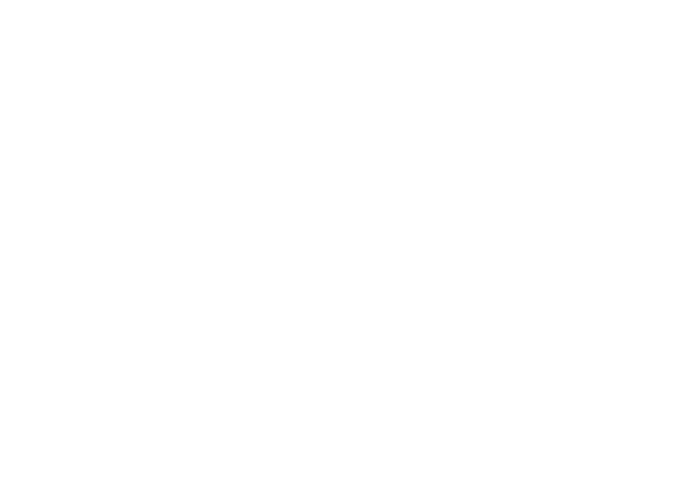

In [86]:
x = np.linspace(0, 2, 64)  # Define the plotting valuable x
y = np.linspace(0, 2, 64)  # Define the plotting valuable y
z = np.linspace(0, 4, 200)  # Define the plotting valuable z

xi, zi, yi = np.meshgrid(x, z, y)

fig = plt.figure(figsize=(7, 5), facecolor='white')  # Define the figure to make a plot
ax = fig.add_subplot(111, projection='3d')  # Define the 3d plot
im = ax.scatter(xi, yi, zi, c=reduced_array_retract1.flatten(), marker=".", s=8,
                vmax=np.nanmax(reduced_array_retract1),vmin=np.nanmin(reduced_array_retract1)) # Define the scatter plot
plt.colorbar(im)  # Define the colorbar in the scatter plot
ax.set_xlim(left=0, right=2)  # Define the X limit for the plot
ax.set_ylim(top=2, bottom=0)  # Define the Y limit for the plot
ax.set_zlim(top=4, bottom=0)  # Define the Z limit for the plot
plt.show()

In [126]:
reduced_array_retract1 = reduced_array_retract[:,:30,:30]
reduced_array_retract1.shape

(229, 30, 30)

In [15]:
reduced_array_retract.shape

(229, 64, 64)

In [19]:
reduced_array_retract = np.flipud(reduced_array_retract)

<IPython.core.display.Javascript object>


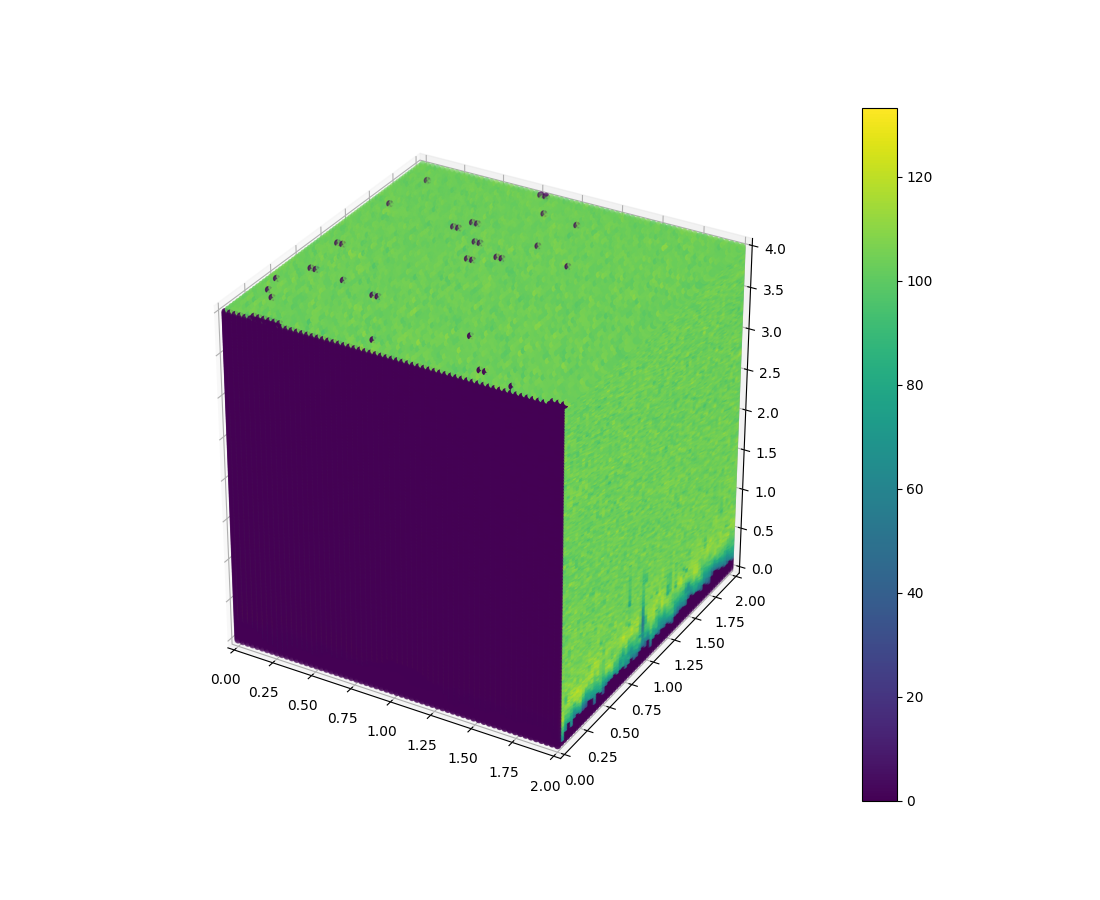

In [49]:
                                              
reduced_array_retract[np.isnan(reduced_array_retract)] = np.nanmin(reduced_array_retract)  # Replace NaN with min value of array. 
                                                                                       
x = np.linspace(0, 2, 64)  # Define the plotting valuable x
y = np.linspace(0, 2, 64)  # Define the plotting valuable y
z = np.linspace(0, 4, 229)
                                                                                       
xi,zi,yi = np.meshgrid(x,z,y)                                                      
                                                                                       
fig = plt.figure(figsize=(11, 9), facecolor='white')               #Define the figu
ax = fig.add_subplot(111, projection='3d')      #Define the 3d plot                
    # Define the scatter plot                                                          
im = ax.scatter(xi, yi, zi, c=reduced_array_retract.flatten(), vmax=np.nanmax(reduced_array_retract), vmin=np.nanmin(reduced_array_retract))
plt.colorbar(im)                                # Define the colorbar in the scatte
ax.set_xlim(left=0, right=2)  # Define the X limit for the plot
ax.set_ylim(top=2, bottom=0)  # Define the Y limit for the plot
ax.set_zlim(top=4, bottom=0)  # Define the Z limit for the plot
plt.show()

In [17]:
def threeDplot(Z_direction, linearized):              
   """3D plot function"""                                                                                                                            
   if Z_direction == "Up":                         # If the AFM cantilever moves up
       Z_dir = np.flip(linearized, axis=0)                                         
       data1 = reduced_array_retract                                               
   else:                                           # If the AFM cantilever moves do
       Z_dir = linearized                                                          
       data1 = reduced_array_approach                                              
                                                                                   
   data1[np.isnan(data1)] = np.nanmin(data1)  # Replace NaN with min value of array
                                                                                   
   x = np.linspace(0, 2, 64)         # Define the plotting valuable x
   y = np.linspace(0, 2, 64)         # Define the plotting valuable y
   #z = np.linspace(0, Z_dir.max(), len(data1[:,1,1]))  # Define the plotting val
   z = np.linspace(0, 4, 229)
                                                                                   
   xi,zi,yi = np.meshgrid(x,z,y) 
                                                                                   
   fig = plt.figure(figsize=(11, 9), facecolor='white')               #Define the f
   ax = fig.add_subplot(111, projection='3d')      #Define the 3d plot             
   # Define the scatter plot                                                       
   im = ax.scatter(xi, yi, zi, c=data1.flatten(), vmax=np.nanmax(data1), vmin=np.nanmin(data1))
   plt.colorbar(im)                                # Define the colorbar in the sca
   ax.set_xlim(left=0, right=2)          # Define the X limit for the plo
   ax.set_ylim(top=2, bottom=0)          # Define the Y limit for the plo
   ax.set_zlim(top=np.nanmax(Z_dir), bottom=0)# Define the Z limit for the plot 

In [115]:
print(linearized.max())
print(np.nanmax(linearized))

4.359999999999998
4.359999999999998


<IPython.core.display.Javascript object>


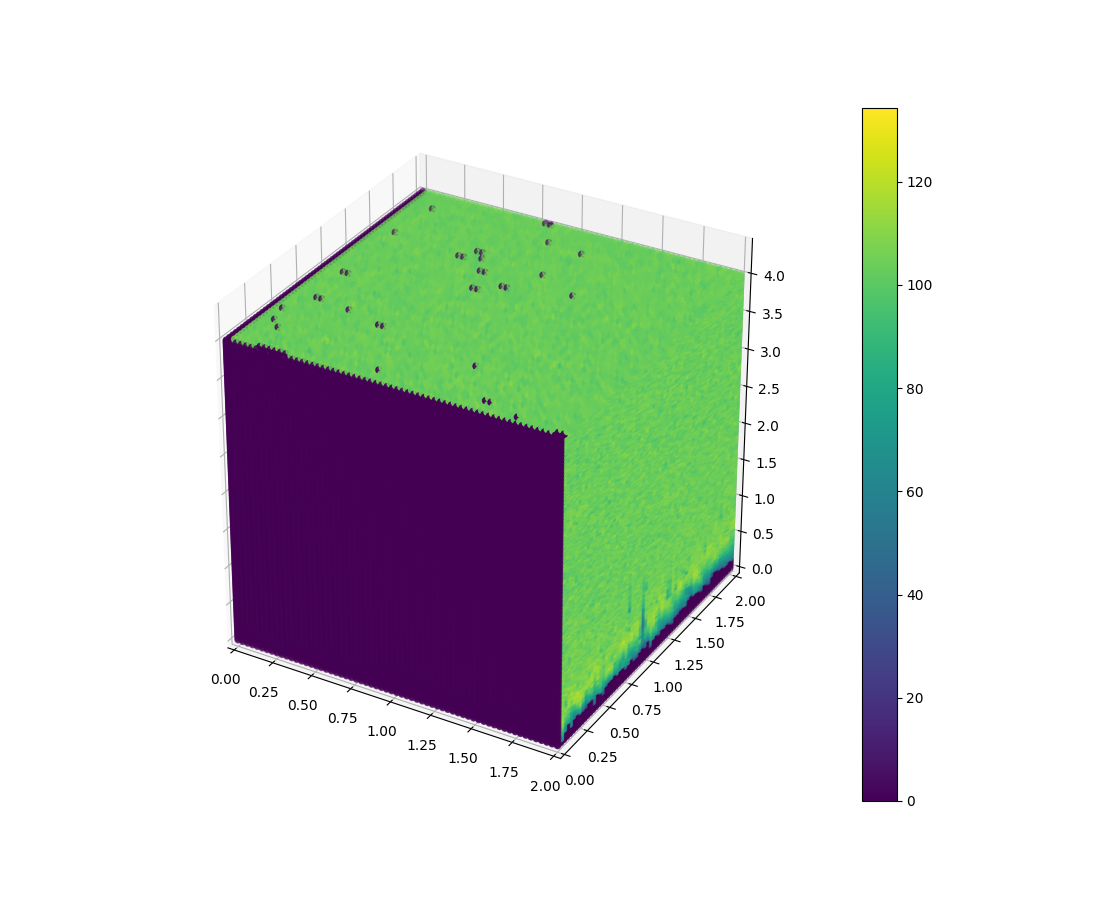

In [39]:
threeDplot("Down",linearized)

In [18]:
def test_correct_slope():
    test = np.array([[1,2,3],[1,2,3]])
    try:
        correct_slope(zsensor)
    except(Exception):
        pass
    else:
        raise Exception("Input numpy array not three dimensional.")
    assert test.ndim == 3,

In [19]:
test_correct_slope()

Exception: Input numpy array not three dimensional.

In [15]:
def test_load_data():
    data, z, z_approach, z_retract = load_data.load_data("PHASEdata.csv")
    try:
        load_data.load_data(123)
    except(Exception):
        pass
    else:
        raise Exception("Input error. String expected")
    assert data.shape == (1000,2305), 'data error'
    assert len(z) == 1000, 'z error'
    assert len(z_approach) == 500, 'z_appraoch error'
    assert len(z_retract) == 500, 'z_retract error'
    return

In [17]:
test_load_data()

NameError: name 'load_data' is not defined

In [28]:
indZ[5,5]

252.39472734028823

In [36]:
def correct_slope(target_threeD_array):                                                                       
    """Function that corrects for sample tilt and generates arrays used in the bin_array                            
    function.                                                                                                       
                                                                                                                    
    :param Zsnsr: 3D numpy array of a single signal feed.  For instance, the entire dataset of                      
    zsensor data.  The function is flexible enough to work on any raw data signal, but can                          
    only work on one at a time.                                                                                     
                                                                                                                    
    Output: 3D numpy array with values adjusted for sample tilt, a 2D numpy array with                              
    the index of the max Zsensor value for each x,y coordinate, 1D numpy array of the X                             
    direction correction, and 1D numpy array of the Y direction correction.                                         
                                                                                                                    
    Example of function calling format:                                                                             
    ZSNSRtotCORR, indZ, driftx, drifty = correct_slope(zsensor)"""                                                  
                                                                                                                    
                                                                                                                    
    assert np.isfortran(target_threeD_array) == True, "Input array not passed through generate_array fucntion.Needs to be column-major indexing."                             
                                                                                                                    
    # Convert Zsnsr matrix from meters to nanometers.                                                               
    target_threeD_array = np.multiply(target_threeD_array, -1000000000)                                             
                                                                                                                    
                                                                                                                    
    # We have create an numpy array of the correct shape to populate.                                               
    array_min = np.zeros((len(target_threeD_array[1, :, 1]), len(target_threeD_array[1, 1, :])))                    
    ind = np.zeros((len(target_threeD_array[1, :, 1]), len(target_threeD_array[1, 1, :])))                          
    # Populate zero arrays with min z values at all x,y positions.  Also, populate indZ array                       
    # with the index of the min z values for use in correct_Zsnsr()                                                 
    for j in range(len(target_threeD_array[1, :, 1])):                                                              
        for i in range(len(target_threeD_array[1, 1, :])):                                                          
            array_min[j, i] = (np.min(target_threeD_array[:, i, j]))                                                
            ind[i, j] = np.min(np.where(target_threeD_array[:, i, j] == np.min(target_threeD_array[:, i, j])))      
                                                                                                                    
    # Find the difference between the max and mean values in the z-direction for                                    
    # each x,y point. Populate new matrix with corrected values.                                                    
    driftx = np.zeros(len(target_threeD_array[1, :, 1]))                                                            
    drifty = np.zeros(len(target_threeD_array[1, 1, :]))                                                            
    corrected_array = np.zeros((len(target_threeD_array[1, :, 1]), len(target_threeD_array[1, 1, :])))              
                                                                                                                    
    # Correct the for sample tilt along to the y-direction, then correct for sample tilt                            
    # along the x-direction.                                                                                        
    for j in range(len(target_threeD_array[1, :, 1])):                                                              
        for i in range(len(target_threeD_array[1, 1, :])):                                                          
            drifty[j] = np.mean(array_min[j, :])                                                                    
            driftx[i] = np.mean(corrected_array[:, i])                                                              
                                                                                                                    
    # Apply corrected slope to each level of 3D numpy array                                                         
    arraytotcorr = np.empty_like(target_threeD_array)                                                               
    for j in range(len(target_threeD_array[1, :, 1])):                                                              
        for i in range(len(target_threeD_array[1, 1, :])):                                                          
            arraytotcorr[:, i, j] = target_threeD_array[:, i, j] - driftx[i] - drifty[j]                            
                                                                                                                    
                                                                                                                    
    ##################################################################################                              
    #CROP = 15                                                                                                      
    #[zSIZE, xSIZE, ySIZE] = Zsnsr.shape                                                                            
    #j1 = 1; j2 = ySIZE; i1 = 1; i2 = xSIZE                                                                         
                                                                                                                    
    #Zcorr = max(max(Zcorr[CROP : len(Zcorr) - CROP, CROP : len(Zcorr) - CROP])) - Zcorr                            
    #Dcorr = max(max(Dcorr[CROP : len(Dcorr) - CROP, CROP : len(Dcorr) - CROP])) - Dcorr                            
    #############################################################################################################   
                                                                                                                    
    # NEED TO EVALUATE ASSERTS, THEY DON'T WORK ON BOTH ZSNSR AND DRIVE.                                            
                                                                                                                    
    #assert (all((len(Zarraytotcorr)/2-200) <= value <= (len(Zarraytotcorr)/2+200) for value in indZ[1,:])) == True,
    #    "Max extension in wrong location, check input array."                                                      
    #assert (all((len(Zarraytotcorr)/2-200) <= value <= (len(Zarraytotcorr)/2+200) for value in indZ[:,1])) == True,
    #    "Max extension in wrong location, check input array."                                                      
                                                                                                                    
    return arraytotcorr, ind                                                                                        
                                                                                                                    
def bin_array(arraytotcorr, indmax, rawarray1, rawarray2):                                                       
    """                                                                                                             
    Function to reduce the size of large datasets.  Data placed into equidistant bins for each x,y coordinate and   
    new vector created from the mean of each bin.  Size of equidistant bins determined by 0.01 nm increments of     
    Zsensor data.                                                                                                   
    :param arraytotcorr: Zsensor data corrected for sample tilt using correct_slope function.  Important to use this
     and not raw Zsensor data so as to get an accurate Zmax value.                                                  
    :param ind: Index of Zmax for each x,y coordinate to cut data set into approach and retract.                    
    :param rawarray: 3D numpy array the user wishes to reduce in size (e.g. phase, amp)                             
    :return: 3D numpy array of binned approach values, 3D numpy array of binned retract values.                     
    """                                                                                                             
                                                                                                                    
    # Generate empty numpy array to populate.                                                                       
                                                                                                                    
                                                                                                                    
    assert np.isfortran(arraytotcorr) == True, "Input Phase array not passed through generate_array fucntion. Needs to be column-major indexing."                             
                                                                                                                    
    arraymean = np.zeros(len(arraytotcorr[:, 1, 1]))                                                                
                                                                                                                    
    # Create list of the mean Zsensor value for each horizontal slice of Zsensor array.                             
    for z in range(len(arraymean)):                                                                                 
        arraymean[z] = np.mean(arraytotcorr[z, :, :])                                                               
                                                                                                                    
    # Turn mean Zsensor data into a linear vector with a step size of 0.02 nm.                                      
    linearized = np.arange(-0.2, arraymean.max(), 0.02)                                                             
                                                                                                                    
    # Generate empty array to populate                                                                              
    reduced_array_approach1 = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))   
    reduced_array_approach2 = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))   
    reduced_array_retract1 = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))    
    reduced_array_retract2 = np.zeros((len(linearized), len(arraytotcorr[1, :, 1]), len(arraytotcorr[1, 1, :])))    
    # Cut raw phase/amp datasets into approach and retract, then bin data according to the linearized Zsensor data. 
    # Generate new arrays from the means of each bin.  Perform on both approach and retract data.                   
    for j in range(len(arraytotcorr[1, :, 1])):                                                                     
        for i in range(len(arraytotcorr[1, 1, :])):                                                                 
            z = arraytotcorr[:(int(indmax[i, j])), i, j]  # Create dataset with just retract data                      
            digitized = np.digitize(z, linearized)  # Bin Z data based on standardized linearized vector.           
            for n in range(len(linearized)):                                                                        
                ind = list(np.where(digitized == n)[0])  # Find which indices belong to which bins                  
                # Find the mean of Phase array's bins and populate new array.                                       
                reduced_array_approach1[n, i, j] = np.mean(rawarray1[ind, i, j])                                    
                reduced_array_approach2[n, i, j] = np.mean(rawarray2[ind, i, j])                                    
                                                                                                                    
    for j in range(len(arraytotcorr[1, :, 1])):                                                                     
        for i in range(len(arraytotcorr[1, 1, :])):                                                                 
            z = arraytotcorr[-(int(indmax[i, j])):, i, j]  # Create dataset with just approach data.                   
            z = np.flipud(z)  # Flip array so surface is at the bottom on the plot.                                 
            digitized = np.digitize(z, linearized)  # Bin Z data based on standardized linearized vector.           
            for n in range(len(linearized)):                                                                        
                ind = list(np.where(digitized == n)[0])  # Find which indices belong to which bins                  
                                                                                                                    
                # Find the mean of Phase array's bins and populate the new array.                                   
                reduced_array_retract1[n, i, j] = np.mean(rawarray1[ind, i, j])                                     
                reduced_array_retract2[n, i, j] = np.mean(rawarray2[ind, i, j])                                     
                                                                                                                    
    #  Merge Phase and Amp array into two different reduced array, contains approach and retract movement           
    reduced_array1 = np.concatenate((reduced_array_approach, reduced_array_retract), axis=0)                        
    reduced_array2 = np.concatenate((reduced_array_approach, reduced_array_retract), axis=0)                        
                                                                                                                    
    return linearized, reduced_array1, reduced_array_approach1, reduced_array_retract1, reduced_array2, reduced_array_approach2, reduced_array_retract2                                                                                                               

In [26]:
ZSNSRtotCORR, indZ = correct_slope(zsensor)

In [ ]:
ind

In [34]:
(int(indZ[5, 5]))

2505

In [35]:
ZSNSRtotCORR[:(int(indZ[5, 5])), 5, 5]

array([ 4.45236292,  4.45241977,  4.45244819, ..., -0.0116076 ,
       -0.01163603, -0.01163603])

In [37]:
Zlinear, zreduced1, approach1, retract1, zreduced2, approach2, retract2 = bin_array(ZSNSRtotCORR, indZ, phase, phase)

/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Ellen_M/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
